<a href="https://colab.research.google.com/github/KalyanMohanty/Tensorflow_series/blob/master/Predict_fuel_efficiency_using_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The difference between regression and classification method is in regression we try to analyze and predict the continuous value whereas in case of classification model we have different class.

* e.g.: fuel efficiency classification of late 1970s and 1980s cars is an example of regression.

* Basic image clasiification is an example of classification method where there are different classes for fashion material.

In [0]:
import pathlib
import seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [22]:
!pip install -q git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

The dataset is available from the UCI Machine Learning Repository.

In [23]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path


'/root/.keras/datasets/auto-mpg.data'

In [0]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

In [25]:
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


# Cleaning the data

In [26]:
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
dataset = dataset.dropna()

'Origin' colu,mn is catagorical. So convert that to a one-hot:

In [0]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2:'Europe', 3:'japan'})

In [0]:
dataset = pd.get_dummies(dataset, prefix = '', prefix_sep = '')

In [30]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,USA,japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,1,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,1,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,1,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,1,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,1,0


In [0]:
train_dataset = dataset.sample(frac = 0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

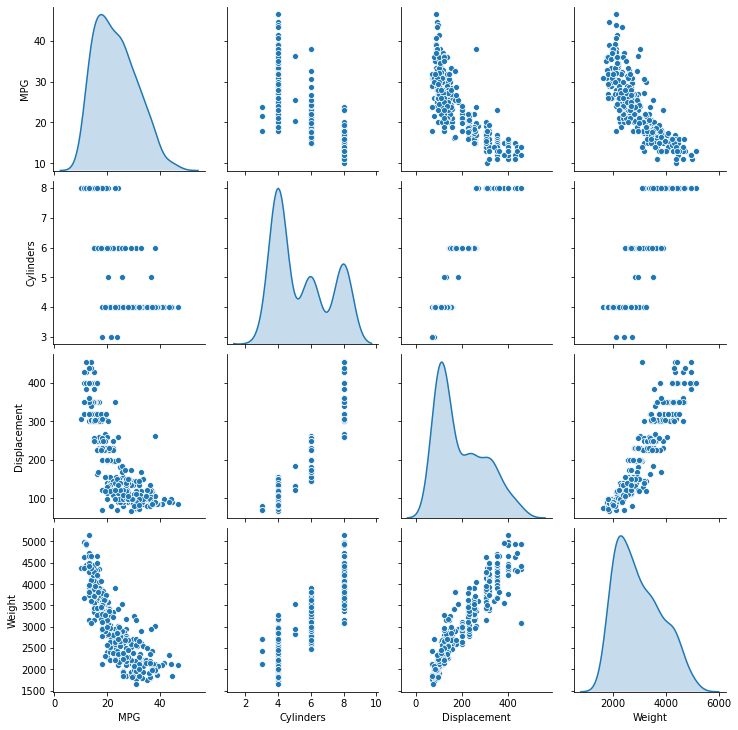

In [32]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [33]:
train_stats = train_dataset.describe()
train_stats.pop('MPG')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [0]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

# Data normalize

In [0]:
def norm(X):
  return (X - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

# Model Building

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


Now try out the model. Take a batch of 10 examples from the training data and call model.predict on it.

In [42]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.11732005],
       [0.42066437],
       [0.4290446 ],
       [0.60194296],
       [0.7782352 ],
       [0.2841054 ],
       [0.80081034],
       [1.0917356 ],
       [0.12462991],
       [0.5511808 ]], dtype=float32)

In [43]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:536.4326,  mae:21.9128,  mse:536.4326,  val_loss:509.9007,  val_mae:21.3291,  val_mse:509.9007,  
....................................................................................................
Epoch: 100, loss:5.6339,  mae:1.6535,  mse:5.6339,  val_loss:8.8516,  val_mae:2.2544,  val_mse:8.8516,  
....................................................................................................
Epoch: 200, loss:5.0562,  mae:1.5433,  mse:5.0562,  val_loss:8.8967,  val_mae:2.2902,  val_mse:8.8967,  
....................................................................................................
Epoch: 300, loss:4.5987,  mae:1.4399,  mse:4.5987,  val_loss:8.6655,  val_mae:2.2599,  val_mse:8.6655,  
....................................................................................................
Epoch: 400, loss:4.1468,  mae:1.3821,  mse:4.1468,  val_loss:8.9299,  val_mae:2.2874,  val_mse:8.9299,  
..............................................................

In [44]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.325117,0.962729,2.325117,8.761374,2.278557,8.761374,995
996,2.257925,1.006414,2.257925,9.710767,2.427908,9.710767,996
997,2.574072,1.042070,2.574072,9.354345,2.400923,9.354345,997
998,2.220678,0.926517,2.220678,9.351524,2.404983,9.351524,998
999,2.348523,0.951039,2.348523,9.169890,2.395781,9.169890,999


In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

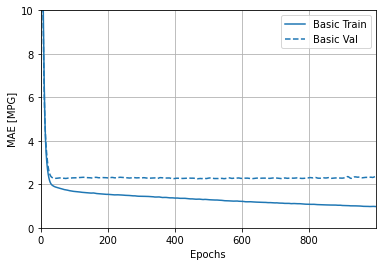

In [46]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

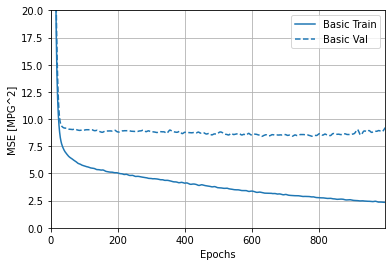

In [47]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

This graph shows little improvement, or even degradation in the validation error after about 100 epochs. Let's update the model.fit call to automatically stop training when the validation score doesn't improve. We'll use an EarlyStopping callback that tests a training condition for every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

In [48]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:581.1036,  mae:22.8389,  mse:581.1036,  val_loss:571.0103,  val_mae:22.6083,  val_mse:571.0103,  
.........................................................................

Text(0, 0.5, 'MAE [MPG]')

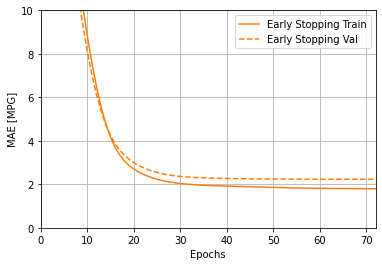

In [49]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

The graph shows that on the validation set, the average error is usually around +/- 2 MPG. Is this good? We'll leave that decision up to you.

Let's see how well the model generalizes by using the test set, which we did not use when training the model. This tells us how well we can expect the model to predict when we use it in the real world.

In [50]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 6.0277 - mae: 1.9245 - mse: 6.0277
Testing set Mean Abs Error:  1.92 MPG


# Predictions

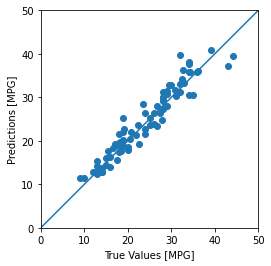

In [51]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


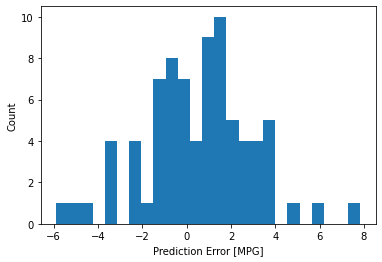

In [52]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

Conclusion
This notebook introduced a few techniques to handle a regression problem.

Mean Squared Error (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).
Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE).
When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.
Early stopping is a useful technique to prevent overfitting.